# Análise Exploratória de Dados em Linguagem Python para a área de Varejo

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sqlite3

# Carregando os Dados

In [235]:
#Carregando os dados
df = pd.read_csv(r"C:\Users\marce\OneDrive\Faculdade\Cursos\Fundamentos de Linguagem Python Para Análise de Dados e Data Science\dataset_projeto.csv")

In [236]:
#Shape
df.shape

(9700, 11)

In [237]:
#Head
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [238]:
#Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


# Análise Exploratória

Para ver se não tem nada que possa causar algum erro

In [239]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [240]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [241]:
#Resumo estatístico da coluna Venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [242]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [243]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de Negócio 1:

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?


In [244]:
#Vamos filtrar a tabela para analisar apenas o que desejamos
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [245]:
df_p1

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


In [246]:
#Agrupamos por cidade, e calculamos o total de valor_venda
df_p1_total = df_p1[['Cidade', 'Valor_Venda']].groupby('Cidade').sum()

In [247]:
df_p1_total

,Valor_Venda
Cidade,
Aberdeen,25.500
Abilene,1.392
Akron,1107.646
Albuquerque,943.122
Alexandria,4879.790
...,...
Woonsocket,142.590
Yonkers,665.964
York,395.920


In [248]:
#Então encontramos a cidade com maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()

#Usa o idxmax(), para encontrar o valor maximo
print("Cidade com maior valor de venda para 'Office Supplies': ", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies':  Valor_Venda    New York City
dtype: object


In [249]:
#Para conferir o resultado
df_p1_total.sort_values(by=['Valor_Venda'], ascending = False)

#Coloca o By da coluna que voce quer
#Acending é a ordem, se é False, é do maior para o menor

,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


## Pergunta de Negócio 2:

Qual o Total de Vendas Por Data do Pedido?

  Demonstre o resultado através de um gráfico de barras

In [250]:
#Vamos filtrar primeiro
df_p2 = df[['Valor_Venda', 'Data_Pedido']]

In [251]:
df_p2

,Valor_Venda,Data_Pedido
0,261.9600,08/11/2017
1,731.9400,08/11/2017
2,14.6200,12/06/2017
3,957.5775,11/10/2016
4,22.3680,11/10/2016
...,...,...
9695,22.8300,15/12/2018
9696,54.3200,15/12/2018
9697,196.7760,15/12/2018
9698,3.6200,30/10/2017


In [254]:
# Convertendo as datas do Data_Pedido para datetime
df_p2['Data_Pedido'] = pd.to_datetime(df_p2['Data_Pedido'], dayfirst=True)


C:\Users\marce\AppData\Local\Temp\ipykernel_12708\4184446058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2['Data_Pedido'] = pd.to_datetime(df_p2['Data_Pedido'], dayfirst=True)


In [255]:
#Somando o total das vendas por data do pedido
total_data = df_p2.groupby('Data_Pedido').sum()


In [256]:
total_data

,Valor_Venda
Data_Pedido,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


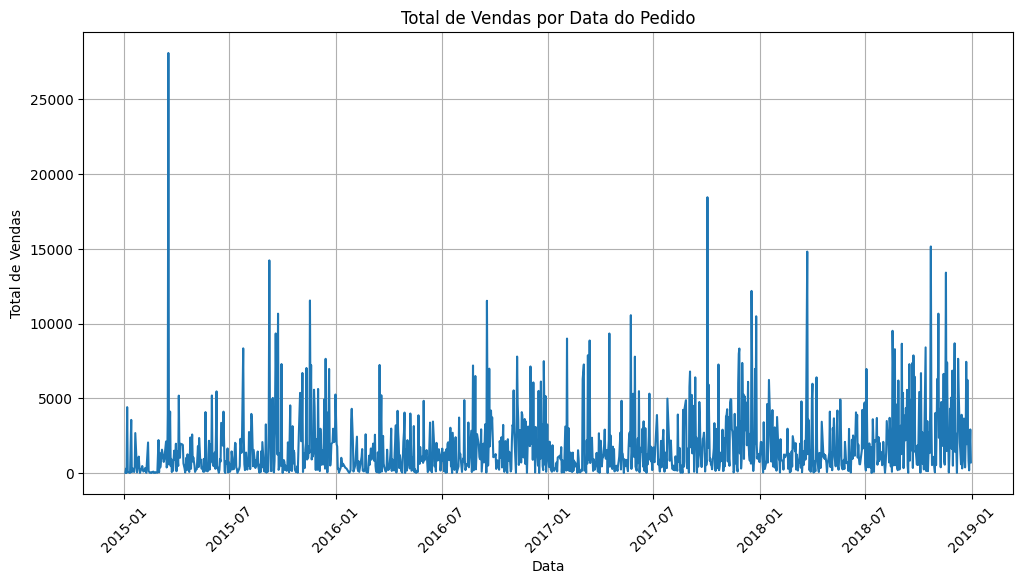

In [257]:
# Gerando o gráfico
plt.figure(figsize=(12,6))
plt.plot(total_data.index.astype('datetime64[ns]'), total_data.values)
plt.title('Total de Vendas por Data do Pedido')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Pergunta de Negócio 3:

Qual o Total de Vendas por Estado?


In [258]:
#Filtrando as colunas primeiro
df_p3 = df[['Estado', 'Valor_Venda']]

In [259]:
df_p3

,Estado,Valor_Venda
0,Kentucky,261.9600
1,Kentucky,731.9400
2,California,14.6200
3,Florida,957.5775
4,Florida,22.3680
...,...,...
9695,California,22.8300
9696,California,54.3200
9697,California,196.7760
9698,California,3.6200


In [260]:
#Fazendo a soma total de vendas por estado
total_estado = df_p3.groupby('Estado').sum()

In [261]:
total_estado

,Valor_Venda
Estado,
Alabama,19510.6400
Arizona,35272.6570
Arkansas,11673.8300
California,442927.0975
Colorado,31841.5980
Connecticut,13366.7370
Delaware,26452.5890
District of Columbia,2865.0200
Florida,88043.7000


## Pergunta de Negócio 4:

Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.
   


In [262]:
#Filtrar os dados por total de vendas nas cidades
df_p4 = df[['Cidade', 'Valor_Venda']]

In [263]:
df_p4

,Cidade,Valor_Venda
0,Henderson,261.9600
1,Henderson,731.9400
2,Los Angeles,14.6200
3,Fort Lauderdale,957.5775
4,Fort Lauderdale,22.3680
...,...,...
9695,Inglewood,22.8300
9696,Inglewood,54.3200
9697,Inglewood,196.7760
9698,San Luis Obispo,3.6200


In [264]:
#Agrupando os valores totais por cidade
total_cidade = df_p4.groupby('Cidade').sum()

In [265]:
total_cidade

,Valor_Venda
Cidade,
Aberdeen,25.500
Abilene,1.392
Akron,2724.244
Albuquerque,2220.160
Alexandria,5519.570
...,...
Woonsocket,195.550
Yonkers,7657.666
York,817.978


In [266]:
#Selecionando os 10 maiores valores

#Função nlargest(int, columns), vai retornar os 10 maiores valores de uma coluna no DataFrame
tabela10 = total_cidade.nlargest(10, 'Valor_Venda')

In [267]:
tabela10

,Valor_Venda
Cidade,
New York City,251749.2190
Los Angeles,171654.6330
Seattle,114725.4780
San Francisco,107489.9520
Philadelphia,107197.8030
Houston,61590.1868
San Diego,47458.3790
Chicago,46974.3430
Jacksonville,44713.1830


In [268]:
#Salvando os nomes das cidades, e do valor venda em uma lista. Para criar o gráfico
list_cidades = tabela10.index.to_list()

In [269]:
list_vendas = tabela10['Valor_Venda'].to_list()

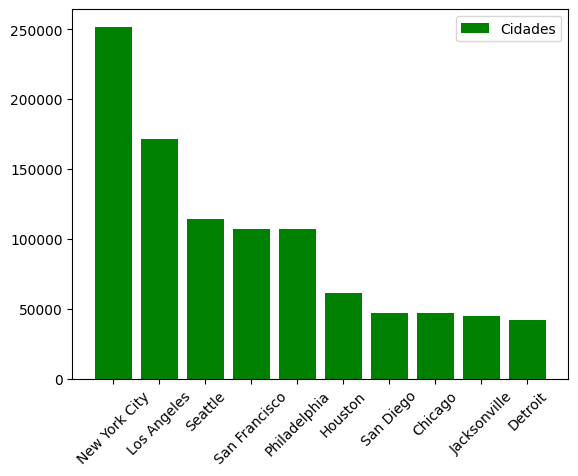

In [270]:
#Montando o gráfico
plt.bar(list_cidades, list_vendas, label='Cidades', color='green')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Pergunta de Negócio 5:

Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.


In [271]:
#Vamos filtrar o DataFrame para apenas segmento e total de vendas
df_p5 = df[['Segmento', 'Valor_Venda']]

In [272]:
df_p5

,Segmento,Valor_Venda
0,Consumer,261.9600
1,Consumer,731.9400
2,Corporate,14.6200
3,Consumer,957.5775
4,Consumer,22.3680
...,...,...
9695,Consumer,22.8300
9696,Consumer,54.3200
9697,Consumer,196.7760
9698,Consumer,3.6200


In [273]:
#Agrupa em Segmento, somando o valor de venda
total_segmento = df_p5.groupby('Segmento').sum()

In [274]:
total_segmento

,Valor_Venda
Segmento,
Consumer,1.133834e+06
Corporate,6.792322e+05
Home Office,4.224914e+05


In [275]:
list_valor = total_segmento['Valor_Venda'].tolist()

In [276]:
#Index para acessar o segmento, porque como ele foi formado através de um groupby precisa colocar ele assim
list_segmento = total_segmento.index.tolist()

In [277]:
cores = ['blue', 'purple', 'pink']

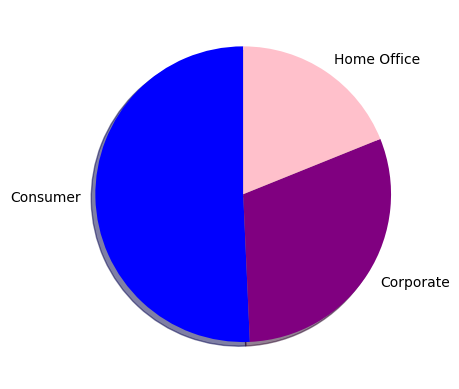

In [278]:
plt.pie(list_valor, labels= list_segmento, colors = cores, startangle = 90, shadow = True)
plt.show()

In [279]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 6:

Qual o Total de Vendas Por Segmento e Por Ano?"


In [280]:
#Vamos ter que separar o ano da Data_Pedido

#Separando em uma lista Python
df['Data_Pedido'].str.split('/')

0       [08, 11, 2017]
1       [08, 11, 2017]
2       [12, 06, 2017]
3       [11, 10, 2016]
4       [11, 10, 2016]
             ...      
9695    [15, 12, 2018]
9696    [15, 12, 2018]
9697    [15, 12, 2018]
9698    [30, 10, 2017]
9699    [31, 07, 2018]
Name: Data_Pedido, Length: 9700, dtype: object

In [281]:
#Como está em uma lista, acessamos a posição da lista que queremos ver a informação
df['Data_Pedido'].str.split('/').str[2].head()

0    2017
1    2017
2    2017
3    2016
4    2016
Name: Data_Pedido, dtype: object

In [282]:
#Agora cria uma nova coluna para esses dados no DataFrame
df['Ano'] = df['Data_Pedido'].str.split('/').str[2]

In [283]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [284]:
#Agora a gente pode fazer o total de vendas por segmento e por ano
total_p6 = df[['Segmento', 'Valor_Venda', 'Ano']].groupby(['Segmento', 'Ano']).sum()

In [285]:
total_p6

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Pergunta de Negócio 7 :

  Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

*  Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
*  Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
  
  Quantas Vendas Receberiam 15% de Desconto?
  


In [286]:
#Criando uma tabela com todos os pedidos que tem direito a receber 15% de desconto
desconto15 = df.query('1000 < Valor_Venda')

In [287]:
desconto15

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
10,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015
24,CA-2016-106320,25/09/2016,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016
27,US-2016-150630,17/09/2016,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016
35,CA-2017-117590,08/12/2017,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017
54,CA-2017-105816,11/12/2017,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,14/10/2015,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015
9636,CA-2016-116638,28/01/2016,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016
9646,CA-2017-107104,26/11/2017,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017
9657,CA-2017-160717,06/06/2017,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017


In [288]:
# Resposta
print("Total de vendas que recebem 15% de desconto: ", len(desconto15))

Total de vendas que recebem 15% de desconto:  457


## Pergunta de Negócio 8 :

Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior.

Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?


In [289]:
#Calculando o valor da média antes
media_antes = desconto15['Valor_Venda'].mean()

In [290]:
media_antes

2116.8078153172864

In [291]:
# Calculando o valor da média depois
media_depois = media_antes - (media_antes*0.15)

In [292]:
print("A média do valor de venda antes e depois do desconto é de ", media_depois)

A média do valor de venda antes e depois do desconto é de  1799.2866430196934


## Pergunta de Negócio 9 :

Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.


In [294]:
# Cria uma nova coluna para o mes
df['Mes'] = df['Data_Pedido'].str.split('/').str[1]

In [295]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10


In [296]:
# Apenas agrupar as 3 colunas que o exercício deseja que agrupe
df_p9 = df.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean().reset_index()

In [297]:
df_p9

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,01,146.736787
1,Consumer,2015,02,117.327926
2,Consumer,2015,03,152.170564
3,Consumer,2015,04,189.762750
4,Consumer,2015,05,191.337439
...,...,...,...,...
139,Home Office,2018,08,176.160606
140,Home Office,2018,09,249.140597
141,Home Office,2018,10,412.576597
142,Home Office,2018,11,247.519423


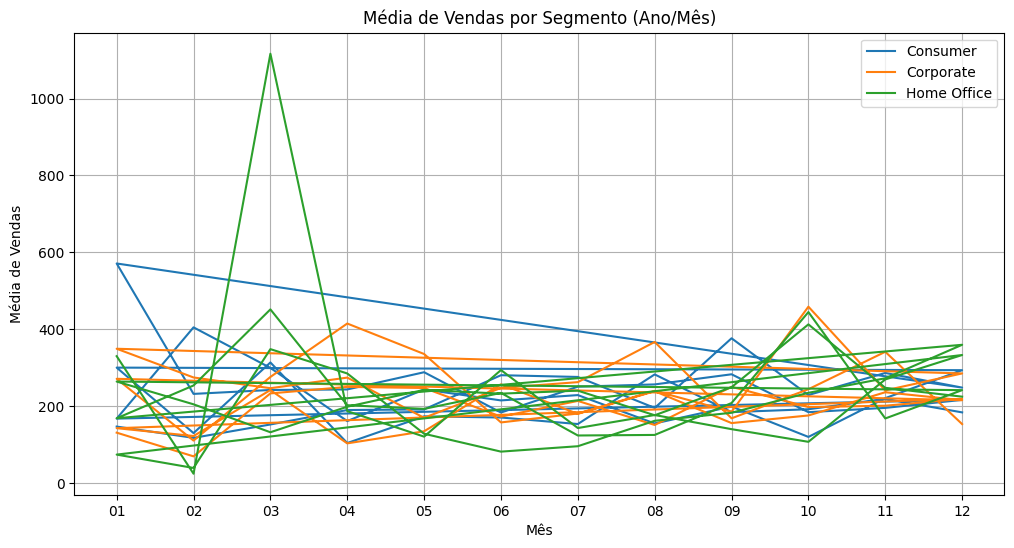

In [298]:
# Gerando o gráfico
plt.figure(figsize=(12,6))

for segmento in df_p9['Segmento'].unique():
    dados = df_p9[df_p9['Segmento'] == segmento]
    plt.plot(dados['Mes'], dados['Valor_Venda'], label=segmento)

plt.title("Média de Vendas por Segmento (Ano/Mês)")
plt.xlabel("Mês")
plt.ylabel("Média de Vendas")
plt.legend()
plt.grid(True)
plt.show()


## Pergunta de Negócio 10 :

Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.

In [299]:
# Fazendo o total de venda por categoria e subcategoria
df_categoria = df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].mean().reset_index()
print(df_categoria)


          Categoria SubCategoria  Valor_Venda
0         Furniture    Bookcases   484.506936
1         Furniture       Chairs   533.422190
2         Furniture  Furnishings    96.067859
3         Furniture       Tables   649.785723
4   Office Supplies   Appliances   229.210778
5   Office Supplies          Art    34.156473
6   Office Supplies      Binders   132.464885
7   Office Supplies    Envelopes    64.453804
8   Office Supplies    Fasteners    14.027850
9   Office Supplies       Labels    34.653576
10  Office Supplies        Paper    57.421192
11  Office Supplies      Storage   262.046499
12  Office Supplies     Supplies   253.721582
13       Technology  Accessories   218.218984
14       Technology      Copiers  2215.880212
15       Technology     Machines  1645.553313
16       Technology       Phones   375.168736


In [300]:
# Fazendo os Top 12
df_top12 = df_categoria.sort_values(['Valor_Venda'], ascending=False).head(12)
print(df_top12)

          Categoria SubCategoria  Valor_Venda
14       Technology      Copiers  2215.880212
15       Technology     Machines  1645.553313
3         Furniture       Tables   649.785723
1         Furniture       Chairs   533.422190
0         Furniture    Bookcases   484.506936
16       Technology       Phones   375.168736
11  Office Supplies      Storage   262.046499
12  Office Supplies     Supplies   253.721582
4   Office Supplies   Appliances   229.210778
13       Technology  Accessories   218.218984
6   Office Supplies      Binders   132.464885
2         Furniture  Furnishings    96.067859


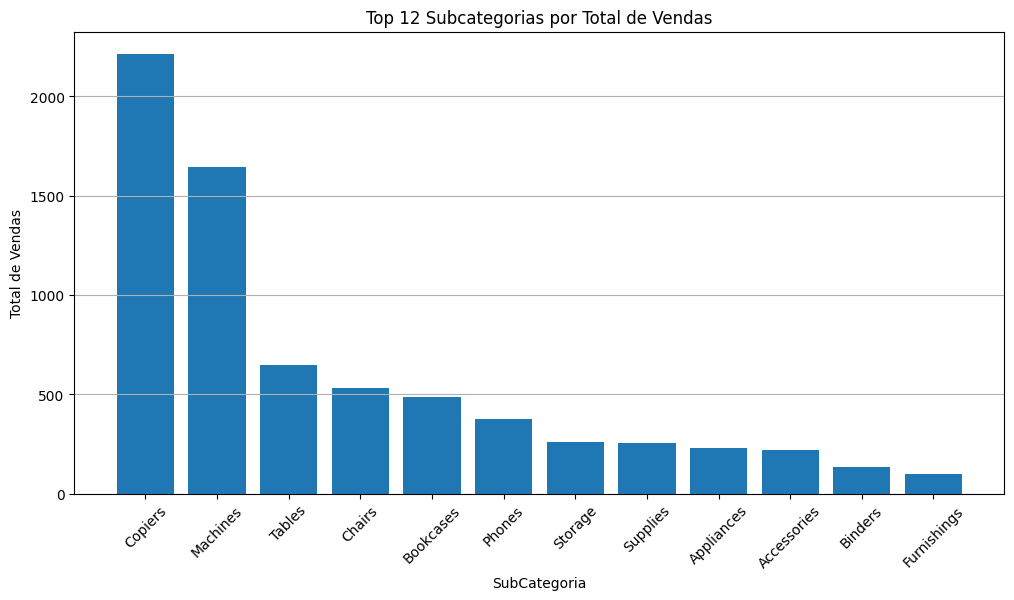

In [301]:
# Gerando o gráfico
plt.figure(figsize=(12,6))
plt.bar(df_top12['SubCategoria'], df_top12['Valor_Venda'])
plt.xticks(rotation=45)
plt.title("Top 12 Subcategorias por Total de Vendas")
plt.xlabel("SubCategoria")
plt.ylabel("Total de Vendas")
plt.grid(axis='y')
plt.show()


## Armazenamento e Consulta de Dados com SQLite

In [302]:
# Criando um banco
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

In [303]:
# Inserindo o dataframe para a tabela sales
df.to_sql("sales", conn, if_exists="replace", index=False)


9700

In [304]:
# Media de vendas por segmento
query = """
SELECT Segmento, AVG(Valor_Venda) AS avg_sales
FROM sales
GROUP BY Segmento
"""
pd.read_sql_query(query, conn)


,Segmento,avg_sales
0,Consumer,225.011775
1,Corporate,231.819859
2,Home Office,244.073618


In [305]:
conn.close()